In [17]:
## 1. remove trash
!rm -rf ~/.local/share/Trash/files/*

## 2. load useful functions
import requests
exec(requests.get('http://miruetoto.github.io/my_code/dataHandling.py').text)
exec(requests.get('http://miruetoto.github.io/my_code/plot.py').text)

## 3. for R user
%load_ext rpy2.ipython

## 5. Check GPU
# from keras import backend as K
# print('GPU check 4 Keras: '+ str(K.tensorflow_backend._get_available_gpus()))
# import torch
# print('GPU check 4 Pytorch: '+ str(torch.cuda.get_device_name(0)))

## 6. Project Setting
#exec(requests.get('http://miruetoto.github.io/my_code/RF/RF.py').text)
#%R source_url('http://miruetoto.github.io/my_code/RF/RF.r')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [5]:
from rpy2.robjects.lib import grdevices
from IPython.display import Image,display

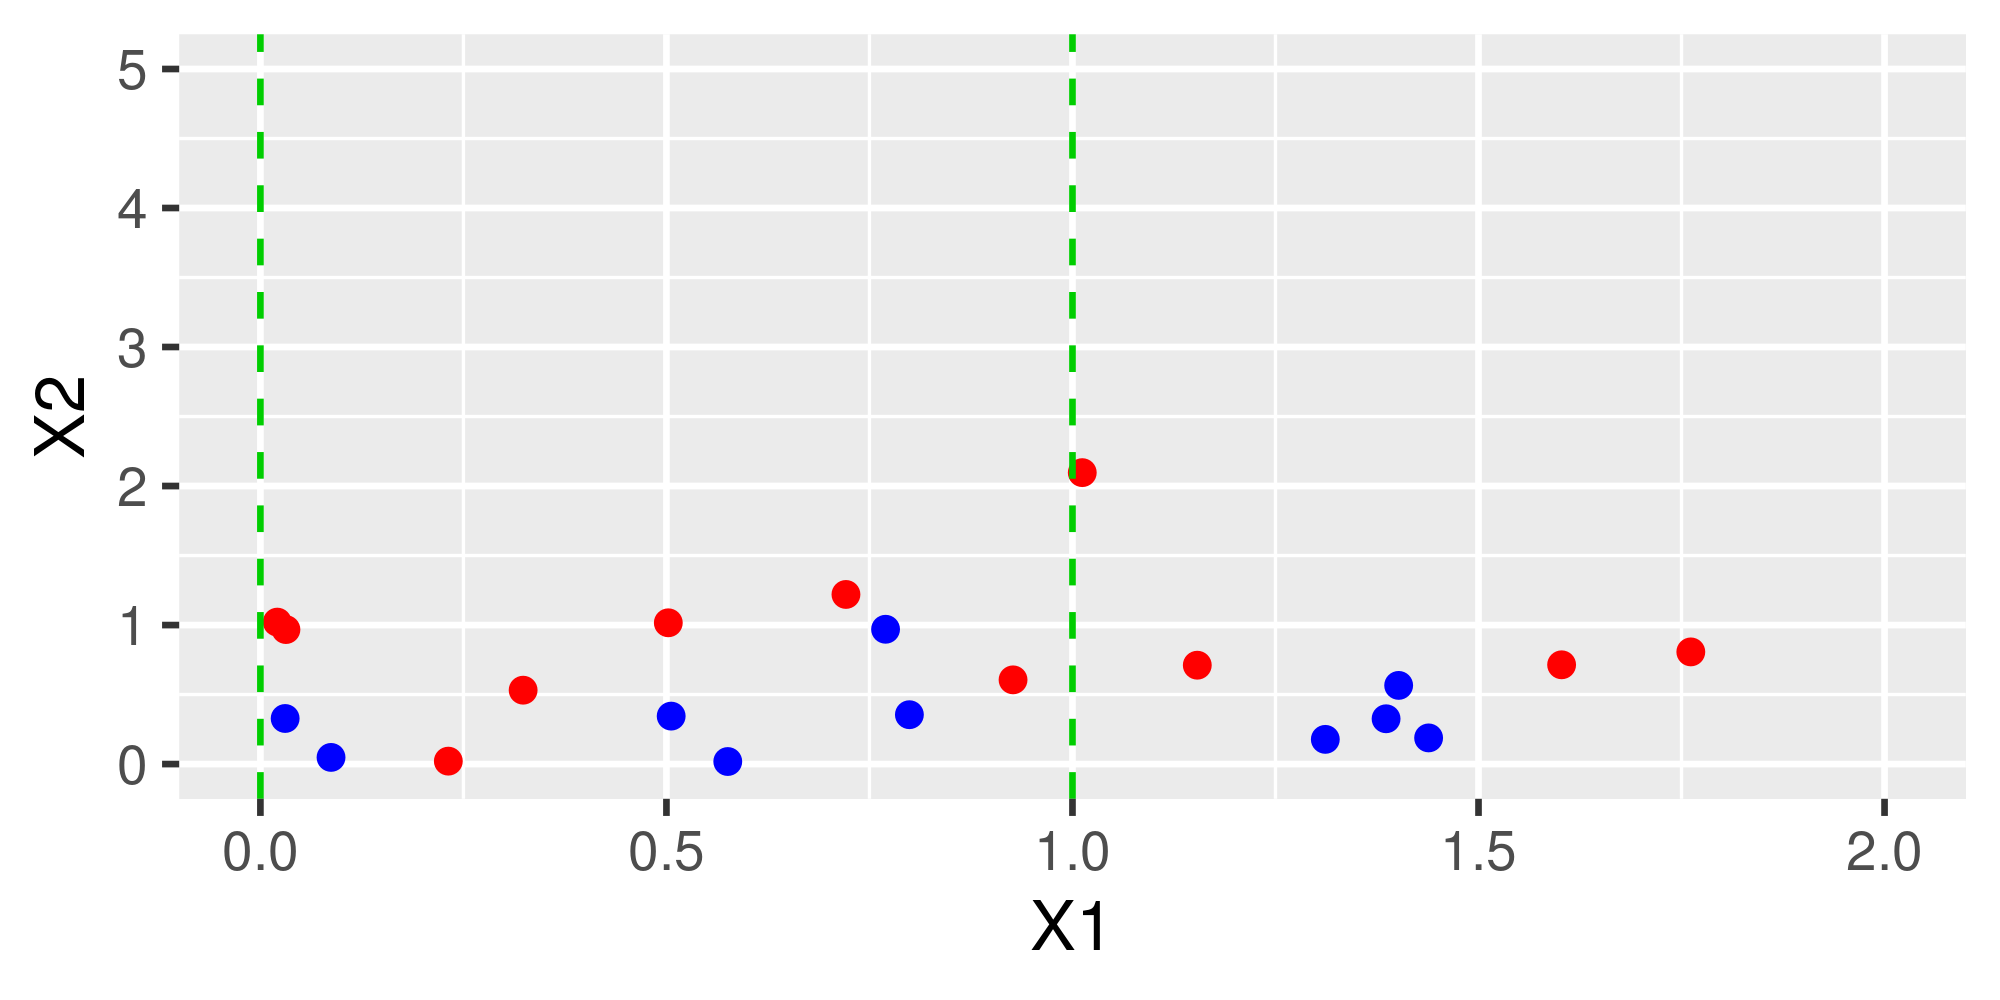

In [18]:
dataf=initpd('n',n=100,p=2)
p = gg.plot(dataf)+\
    gg.aes(x='X1',y='X2') +\
    gg.geom_point(col=[2]*50+[4]*50)+\
    gg.geom_vline(xintercept=p2r([0,1]),col=3,lty=2) +\
    gg.ylim(0,5)
   
gg.show(p)
p = p+gg.xlim(0,2)
gg.show(p)

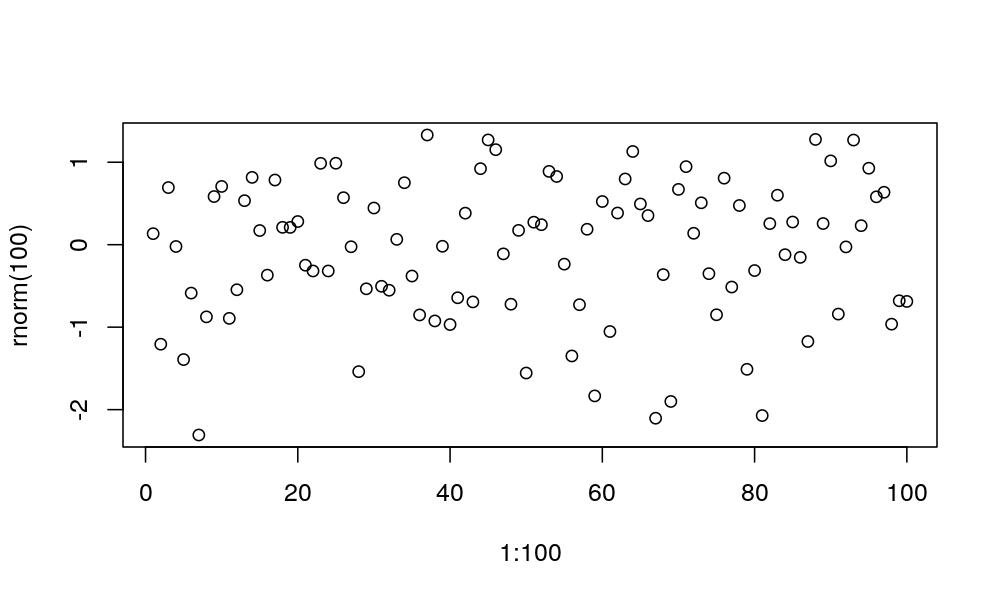

In [13]:
strtemp="plot(1:100,rnorm(100))"
with grdevices.render_to_bytesio(grdevices.jpeg,width=1000,height=600,res=150) as img:
    ro.r(strtemp)
display(Image(data=img.getvalue(),format='jpeg',embed=True))

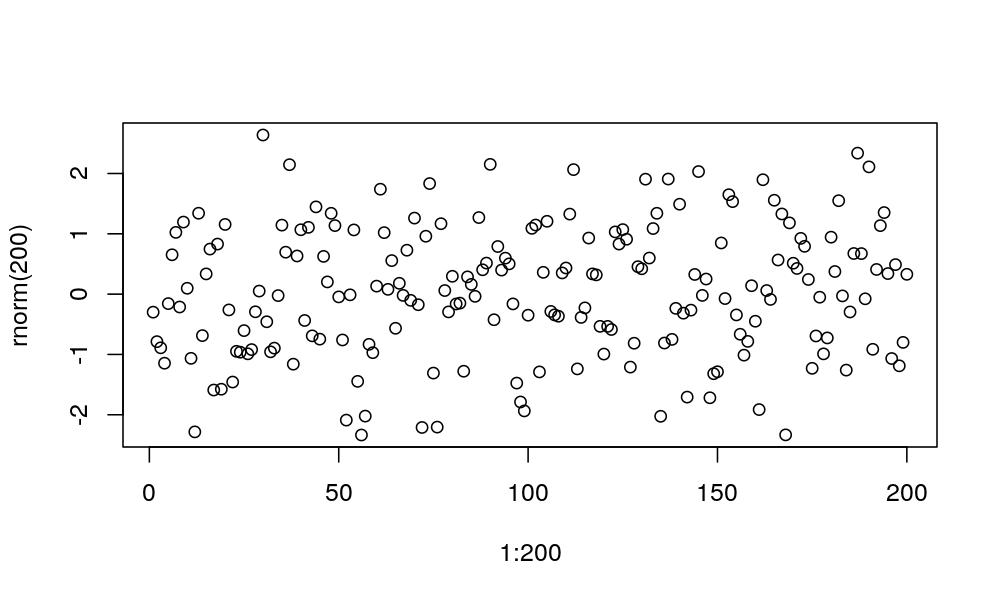

In [14]:
with grdevices.render_to_bytesio(grdevices.jpeg,width=1000,height=600,res=150) as img:
    ro.r("plot(1:200,rnorm(200))")
display(Image(data=img.getvalue(),format='jpeg',embed=True))

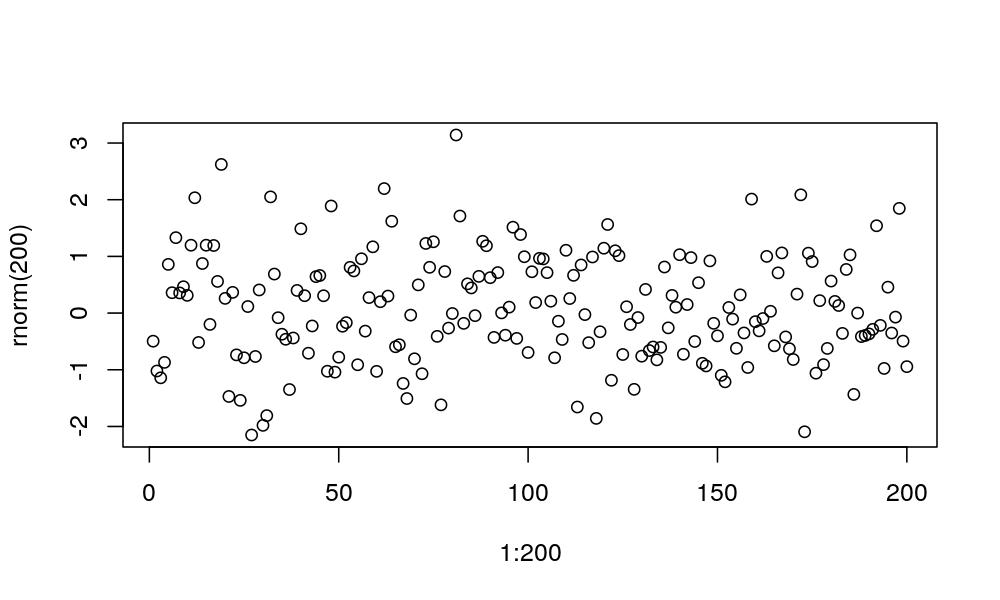

In [15]:
with grdevices.render_to_bytesio(grdevices.jpeg,width=1000,height=600,res=150) as img:
    ro.r("plot(1:200,rnorm(200))")
display(Image(data=img.getvalue(),format='jpeg',embed=True))

In [10]:
from rpy2.ipython.rmagic import RMagics as rmg

In [8]:
    def setup_graphics_temp(self, args):
        """Setup graphics in preparation for evaluating R code.

        args : argparse bunch (should be whatever the R magic got)."""
        
        if getattr(args, 'units') is not None:
            if args.units != "px" and getattr(args, 'res') is None:
                args.res = 450 

        plot_arg_names = ['width', 'height', 'pointsize', 'bg']
        if self.device == 'png':
            plot_arg_names += ['units', 'res']

        argdict = {}
        for name in plot_arg_names:
            val = getattr(args, name)
            if val is not None:
                argdict[name] = val

        tmpd = None
        if self.device in ['png', 'svg']:
            # Create a temporary directory for R graphics output
            # TODO: Do we want to capture file output for other device types other
            # than svg & png?
            tmpd = tempfile.mkdtemp()
            tmpd_fix_slashes = tmpd.replace('\\', '/')

            if self.device == 'png':
                # Note: that %% is to pass into R for interpolation there
                ro.r.png("%s/Rplots%%03d.png" % tmpd_fix_slashes,
                        **argdict)
            elif self.device == 'svg':
                self.cairo.CairoSVG("%s/Rplot.svg" % tmpd_fix_slashes,
                                    **argdict)

        elif self.device == 'X11':
            # Open a new X11 device, except if the current one is already an X11
            # device
            ro.r("""
            if (substr(names(dev.cur()), 1, 3) != "X11") {
                X11()
            }""")

        else:
            # TODO: This isn't actually an R interpreter error...
            raise RInterpreterError("device must be one of ['png', 'X11' 'svg']")

        return tmpd